# Approximating Polynomially Generated Data

The following project is dedicated to the two dry erase markers (blue and black) that lost their lives to my fixation on mathematically deriving each step of forward and backpropogation. Also I dedicate this work to the many lines of code that were written and later thrown out along the way.

### Goal:
Design a simple ANN for learning signals corrupted by noise. 

For demonstration, the following signals will be modeled 
### (a) $f_1(x) = x^4 - 22x^2$
### (b) $f_2(x,y) = x^4 - 22x^2 - y^4 + 22y^2$

where the model will be trained, validated, and tested on 
1. function <b>(a)</b> without noise. 
2. function <b>(b)</b> without noise. 
3. function <b>(a)</b> with samples generated by $Z_k = f_1(X_k) + \epsilon$, where $\epsilon \sim \mathcal{N}(\mu = 0, \sigma = 20)$
4. function <b>(b)</b> with samples generated by $Z_k = f_1(X_k) + \epsilon$, where $\epsilon \sim \mathcal{N}(\mu = 0, \sigma = 50)$



##### 2. List the choices that need to be made when designing an ANN learning system that have already been made for you in this assignment.
* determine an objective function $f$
* determine if task is a regression or classification task
* decide how many inputs $N$ are associated with $f$
* decide how many outputs $M$ are associated with $f$
* determine on what interval the objective function is valid 
* select an optimization/learning approach/learning rule for adjusting weights during training


##### 3. For each of these choices, list which option professor chooses in making this assignment.
* we have two objective functions $f_1(x) = x^4 - 22x^2$ and $f_2(x,y) = x^4 - 22x^2 - y^4 + 22y^2$)
* determine if task is a regression or classification task: regression
* decide how many inputs $N$ are associated with the target ($N = 2$)
* decide how many outputs $M$ are associated with $f$ ($M = 1$)
* the first objective function is defined on $[-5, 5]$, and the second objective function is defined on $[-5, 5]^2$
* decide a particular optimization/learning approach/learning rule (supervised learning via error backpropagation)


##### 4. List the choices you need to make regarding the design of your ANN
* for a signal-plus-noise model $Z = f(X, Y) + \epsilon$, decide what assumptions can be made, if any, about the noise and outliers
* define a loss function $L$ penalizing deviations from $f$
* decide a learning rate to initialize $\eta$
* decide how many layers hidden layers $H$ are necessary to capture features
* decide how many hidden units $H_n$ are required for the $n$'th hidden layer
* decide if artificial neurons will consist of summation units or product units or a mixture
* determine how prior weights and biases between AN will be initialized
* use domain knowledge to select non-linear activation functions that also work as desired with the training method
* decide an appropriate number of samples to be used for training, validation, and test sets
* decide an approprate batch size for updating weight vectors
* decide how epochs should be organized and how many to execute before training stops
* decide any other indications of overfitting that suggests training should stop

##### 5/7. Choose an option that seems reasonable to you for each of these design choices and explain why it seems reasonable to you.

* because no prior information is known about the system, we follow the principle of maximum entropy and assume that the noise is Gaussian $\epsilon \sim^{iid} \mathcal{N}(\mu = 0, \sigma = c)$, since the family of exponential distributions are easy to work with using Baye's theorem.
* for a signal-plus-noise model $Z = f(X, Y) + \epsilon$, this project will compare two loss functions for approximating $f_1$ and $f_2$:
    - $L_1(\hat f) = \sum \{Z - \hat f(x,y)\}^2$ for penalizing large values 
    - $L_2(\hat f) = \sum \{Z - \hat f(x,y)\}^2$ because we expect a large variance
* let $\eta = 0.01$
* we will create a network with $H = 2$ hidden layers for not much rhyme or reason
* we will use $h_1 = h_2 = 4$ for not much rhyme or reason
* artificial neurons will be summation units because this is what I am most familiar with (I am not sure why this is preferred over product units)
* prior weights will be assigned randomly because I have no prior knowledge about how weights can approximate the objective function. all biases $b$ will be initialized to 1, since $b \ne 0$ allows the backpropogation algorithm to adjust biases for a value that optimizes the given objective function
* the ReLU function will be used for its easy differentiability (required for backprop) and because any linear combination of ReLU functions will result in piecewise linear outputs, and this will make it easier to graphically visualize weights



9. <u>How many data samples will you use to train your ANN? To validate it? To test it?</u>
      * The following numbers were seleted without much justification. Samples were be draw in in the following quantities: 
        - 4000 random uniformly distributed for training (this is randomly chosen by me), 
        - 500 random uniformly distributed for  validation (again, random)
        - 500 uniformly distributed for testing
    
    
* If you run your ANN more than once, what will you change from run to run? What will you keep the same?
    - starting weights will be kept the same to ensure that the learning rule does not learn quicker due to a different set of starting conditions

* What data will you collect?
    - during training, I will determine the training loss and validation loss after each epoch

* What data will you report? Everything? Best performance? Worst performance? Averages? If averages, what will be averaged together? Average error at a given time step during a single run? At the end of a run? Averages over multiple runs?
* How will you report this data? Text? Numbers? Graphs? What form will these take?
* What conclusions will you be able to draw from your results?

## ANN Implementation


In [4]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import math
import tensorflow as tf
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

SAMPLE_SIZE=5000
def signal1(x): return x**4 - 22*x**2
def signal2(x): return x[0]**4 - 22*x[0]**2 + x[1]**4 - 22*x[1]**2

### 10. Fitting ANN on f(x) without noise.

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 20)                40        
                                                                 
 dense_13 (Dense)            (None, 16)                336       
                                                                 
 dense_14 (Dense)            (None, 12)                204       
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 4)                 36        
                                                                 
 dense_17 (Dense)            (None, 1)                 5         
                                                                 
Total params: 725
Trainable params: 725
Non-trainable 

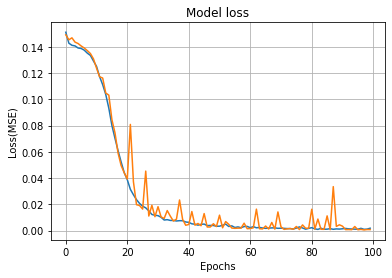

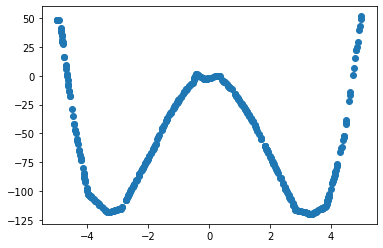

Mean Squared error on test set: [12.654943]


In [5]:
x = np.random.uniform(-5,5,SAMPLE_SIZE)
y = np.apply_along_axis(func1d=signal1, axis=0, arr=x) 

x_train = x[:4000]
x_valid = x[4000:4500]
x_test = x[4500:]

y_train = y[:4000]
y_valid = y[4000:4500]
y_test = y[4500:]

y_scale = max(np.abs(y))
y_train = y_train / y_scale


model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation ="relu", input_dim=1),
    tf.keras.layers.Dense(16,activation = "relu",input_dim=20),
    tf.keras.layers.Dense(12,activation = "relu",input_dim=16),
    tf.keras.layers.Dense(8,activation = "relu",input_dim=12),
    tf.keras.layers.Dense(4,activation = "relu",input_dim=8),
    tf.keras.layers.Dense(1)
])
model.summary()

model.compile(loss='mean_squared_error',optimizer='SGD')
history = model.fit(x_train,y_train,validation_split = 1/math.e, batch_size=30, epochs=100, verbose=0)

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')

plt.grid(True)
plt.show()

x_pred = x_test
y_pred = model.predict(x_pred)
y_pred = y_scale * y_pred
fig = plt.figure()
plt.scatter(x_pred, y_pred)
plt.show()


#Verifying MSE
predictions = y_scale * model.predict(x_test) 
MSE = 0
n=0
for y_hat,y_pred in zip(y_test,predictions):
    MSE+=(y_hat-y_pred)**2
    n+=1
MSE = MSE/n
print("Mean Squared error on test set: {}".format(MSE))

### 11. Reporting results and conclusions regarding the application of your ANN to approximating this function.
Exactly 4000 training examples were divided into batches of size 30 and presented to a network randomly (for the purpose of updating weights) for over 100 epochs.

Our densely-connected, multilayer network with five hidden layers and ReLU activation functions, one continuous input on [-5, 5], one continuous output showed continual improvement on the training set, achieving a training loss near 1%, indicating that GD successfully updated weights to find a local minimum of the loss function.

Between 0 and 20 epochs, both the training and validation set showed decreasing loss. Near 20 epochs, the validation loss increased dramatically, indicating that we overfited the weights of the network to the training set.

In the end, the network showed a **MSE of 12.655 on the test set.**

### 12.

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 20)                40        
                                                                 
 dense_19 (Dense)            (None, 16)                336       
                                                                 
 dense_20 (Dense)            (None, 12)                204       
                                                                 
 dense_21 (Dense)            (None, 8)                 104       
                                                                 
 dense_22 (Dense)            (None, 4)                 36        
                                                                 
 dense_23 (Dense)            (None, 1)                 5         
                                                                 
Total params: 725
Trainable params: 725
Non-trainable 

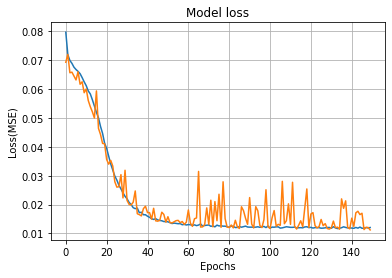

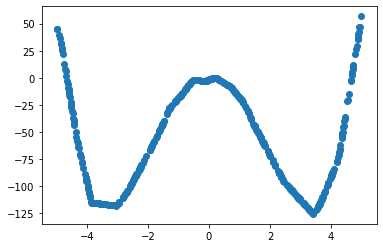

Mean Squared error on test set: [429.3608]


In [6]:
x = np.random.uniform(-5,5,SAMPLE_SIZE)
y = np.apply_along_axis(func1d=signal1, axis=0, arr=x) 
y = y + np.random.normal(0, 20, SAMPLE_SIZE)

x_train = x[:4000]
x_valid = x[4000:4500]
x_test = x[4500:]

y_train = y[:4000]
y_valid = y[4000:4500]
y_test = y[4500:]

y_scale = max(np.abs(y))
y_train = y_train / y_scale


model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation ="relu", input_dim=1),
    tf.keras.layers.Dense(16,activation = "relu",input_dim=20),
    tf.keras.layers.Dense(12,activation = "relu",input_dim=16),
    tf.keras.layers.Dense(8,activation = "relu",input_dim=12),
    tf.keras.layers.Dense(4,activation = "relu",input_dim=8),
    tf.keras.layers.Dense(1)
])
model.summary()

model.compile(loss='mean_squared_error',optimizer='SGD')
history = model.fit(x_train,y_train,validation_split = 1/math.e, batch_size=30, epochs=150, verbose=0)

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')

plt.grid(True)
plt.show()

x_pred = x_test
y_pred = model.predict(x_pred)
y_pred = y_scale * y_pred
fig = plt.figure()
plt.scatter(x_pred, y_pred)
plt.show()


#Verifying MSE
predictions = y_scale * model.predict(x_test) 
MSE = 0
n=0
for y_hat,y_pred in zip(y_test,predictions):
    MSE+=(y_hat-y_pred)**2
    n+=1
MSE = MSE/n
print("Mean Squared error on test set: {}".format(MSE))

### 13. Reporting results and conclusions regarding the application of your ANN to approximating this function with noise.
Exactly 4000 training examples were divided into batches of size 30 and presented to a network randomly (for the purpose of updating weights) for over 150 epochs.

Our densely-connected, multilayer network with five hidden layers and ReLU activation functions, one continuous input on [-5, 5], one continuous output showed continual decresing in the training error, yet, never reaching a training loss below 1%, indicating that GD experienced difficulty updating the weights to find a local minimum of the loss function.

Thoughout training, the validation loss showed a sawtooth-like curve, indicating repeated overfitting and underfitting of the training set. 

In the end, the network showed a **MSE of 429.361 on the test set.**

### 14

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 20)                60        
                                                                 
 dense_37 (Dense)            (None, 16)                336       
                                                                 
 dense_38 (Dense)            (None, 12)                204       
                                                                 
 dense_39 (Dense)            (None, 8)                 104       
                                                                 
 dense_40 (Dense)            (None, 4)                 36        
                                                                 
 dense_41 (Dense)            (None, 1)                 5         
                                                                 
Total params: 745
Trainable params: 745
Non-trainable 

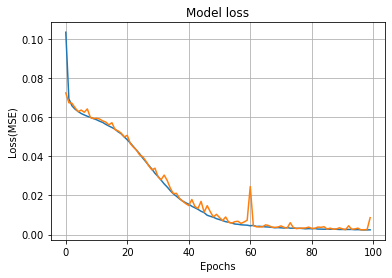

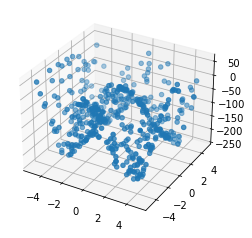

Mean Squared error on test set: [402.66727]


In [9]:
x = np.random.uniform(-5,5,SAMPLE_SIZE*2).reshape(-1,2)
y = np.apply_along_axis(func1d=signal2, axis=1, arr=x) 

x_train = x[:4000]
x_valid = x[4000:4500]
x_test = x[4500:]

y_train = y[:4000]
y_valid = y[4000:4500]
y_test = y[4500:]

y_scale = max(np.abs(y))
y_train = y_train / y_scale


model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation ="relu", input_dim=2),
    tf.keras.layers.Dense(16,activation = "relu",input_dim=20),
    tf.keras.layers.Dense(12,activation = "relu",input_dim=16),
    tf.keras.layers.Dense(8,activation = "relu",input_dim=12),
    tf.keras.layers.Dense(4,activation = "relu",input_dim=8),
    tf.keras.layers.Dense(1)
])
model.summary()

model.compile(loss='mean_squared_error',optimizer='SGD')
history = model.fit(x_train,y_train,validation_split = 1/math.e, batch_size=30, epochs=100, verbose=0)

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')

plt.grid(True)
plt.show()

x_pred = x_test
y_pred = model.predict(x_pred)
y_pred = y_scale * y_pred
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xs=x_pred[:,0], ys=x_pred[:,1], zs=y_pred, zdir='z')
plt.show()

predictions = y_scale * model.predict(x_test) 
MSE = 0
n=0
for y_hat,y_pred in zip(y_test,predictions):
    MSE+=(y_hat-y_pred)**2
    n+=1
MSE = MSE/n
print("Mean Squared error on test set: {}".format(MSE))

### 15. Reporting results and conclusions regarding the application of your ANN to approximating this function with noise.
Exactly 4000 training examples were divided into batches of size 30 and presented to a network randomly (for the purpose of updating weights) for 100 epochs.

Our densely-connected, multilayer network with five hidden layers and ReLU activation functions, two continuous inputs on [-5, 5] $\times$ [-5, 5], one continuous output showed continual decresing in the training error. However, GD experienced difficulty updating the weights without overfitting to the parameters.

Thoughout training, the validation loss showed a weak sawtooth-like curve, indicating repeated overfitting and underfitting of the training set. 

In the end, the network showed a **MSE of 402.667 on the test set.**

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 20)                60        
                                                                 
 dense_49 (Dense)            (None, 16)                336       
                                                                 
 dense_50 (Dense)            (None, 12)                204       
                                                                 
 dense_51 (Dense)            (None, 8)                 104       
                                                                 
 dense_52 (Dense)            (None, 4)                 36        
                                                                 
 dense_53 (Dense)            (None, 1)                 5         
                                                                 
Total params: 745
Trainable params: 745
Non-trainable 

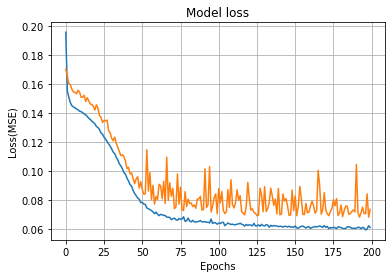

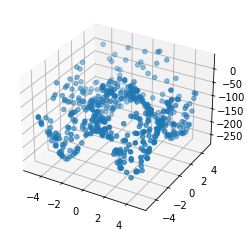

Mean Squared error on test set: [2806.7292]


In [11]:
x = np.random.uniform(-5,5,SAMPLE_SIZE*2).reshape(-1,2)
y = np.apply_along_axis(func1d=signal2, axis=1, arr=x) + np.random.normal(0, 50, SAMPLE_SIZE)

x_train = x[:4000]
x_valid = x[4000:4500]
x_test = x[4500:]

y_train = y[:4000]
y_valid = y[4000:4500]
y_test = y[4500:]
y_scale = y.max()
y_train = y_train / y_scale


model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation ="relu", input_dim=2),
    tf.keras.layers.Dense(16,activation = "relu",input_dim=20),
    tf.keras.layers.Dense(12,activation = "relu",input_dim=16),
    tf.keras.layers.Dense(8,activation = "relu",input_dim=12),
    tf.keras.layers.Dense(4,activation = "relu",input_dim=8),
    tf.keras.layers.Dense(1)
])
model.summary()

model.compile(loss='mean_squared_error',optimizer='SGD')
history = model.fit(x_train,y_train,validation_split = 1/math.e, batch_size=30, epochs=200, verbose=0)

plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='validation loss')

plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss(MSE)')

plt.grid(True)
plt.show()

x_pred = x_test
y_pred = model.predict(x_pred)
y_pred = y_scale * y_pred
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.scatter3D(xs=x_pred[:,0], ys=x_pred[:,1], zs=y_pred, zdir='z')
plt.show()

predictions = y_scale * model.predict(x_test) 
MSE = 0
n=0
for y_hat,y_pred in zip(y_test,predictions):
    MSE+=(y_hat-y_pred)**2
    n+=1
MSE = MSE/n
print("Mean Squared error on test set: {}".format(MSE))

### 17. Report your results and conclusions regarding the application of your ANN to approximating this function.
Exactly 4000 training examples were divided into batches of size 30 and presented to a network randomly (for the purpose of updating weights) for 100 epochs.

Our densely-connected, multilayer network with five hidden layers and ReLU activation functions, two continuous inputs on [-5, 5] $\times$ [-5, 5], one continuous output showed continual decresing in the training error. However, GD experienced difficulty updating the weights without overfitting to the parameters.

Thoughout training, the validation loss showed a strong sawtooth-like curve, indicating repeated overfitting and underfitting of the training set. The addition of noise made the task of learning significantly difficult difficult.

In the end, the network showed a **MSE of 2806.729 on the test set.**

### 18. Compare the performance of your ANN on these two functions with and without noise and report your conclusions.
In both cases, training with noise resulted in signifcant testing error, despite taking measures to avoid overfitting using a validation set.

The amount of error on the test set was proportional to the square of the noise added to the inputs.

Also, training with noise resulted in significant overfitting during the training stage.
